In [1]:
import numpy as np
import random
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
random.seed(17)
at = []
for i in range(100):
    et = np.random.normal(0,1)
    at.append(20+et)

In [3]:
at

[20.701749617352185,
 21.213378004122568,
 21.071434710715586,
 20.67959686608391,
 19.738833787403415,
 20.52443635921874,
 19.549208045520796,
 20.014322107953756,
 19.509073666911906,
 20.6977754704391,
 20.18662070153031,
 19.48782084967447,
 20.398780379092948,
 20.117880253307227,
 19.52938008615489,
 21.2077692834385,
 20.534530778940574,
 17.715354512779097,
 20.116711137659163,
 20.122578711575127,
 17.403514268848316,
 17.565640942283434,
 16.8211115510705,
 20.551240946322185,
 20.27675470756462,
 19.85694211428826,
 20.761392157336022,
 18.20793543515264,
 20.755519540098177,
 20.86531776895528,
 19.481906225830805,
 20.311590176513164,
 20.978016247981348,
 19.892555433421624,
 19.924662821869372,
 21.246115733762156,
 21.529995560197662,
 19.288006204690713,
 20.02160076040715,
 21.095624783050603,
 21.97523290453297,
 21.461645085921585,
 21.315579429720493,
 20.394347928871706,
 20.52913217997736,
 19.591010822721174,
 21.042460306023948,
 20.770740279449118,
 21.360901

In [4]:
# creating Data Frame
data = pd.DataFrame(at, columns=['at'])

In [5]:
data.head()

,at
0,20.701750
1,21.213378
2,21.071435
3,20.679597
4,19.738834


In [7]:
# model with alpha 0.1
model = SimpleExpSmoothing(data['at'])
model_1 = model.fit(smoothing_level=0.1,optimized=False)

In [8]:
model

In [9]:
model_1

In [10]:

f_values = model_1.fittedvalues
f_values

0     20.701750
1     20.701750
2     20.752912
3     20.784765
4     20.774248
        ...    
95    20.036936
96    20.091214
97    20.104259
98    20.161627
99    20.078725
Length: 100, dtype: float64

In [11]:
# model with alpha 0.3
model_2 = model.fit(smoothing_level=0.3,optimized=False)
# For example, to get fitted values:
f_values_2 = model_2.fittedvalues
f_values_2

0     20.701750
1     20.701750
2     20.855238
3     20.920097
4     20.847947
        ...    
95    20.364019
96    20.428729
97    20.366608
98    20.460009
99    20.121789
Length: 100, dtype: float64

In [12]:
# model with alpha 0.5
model_3 = model.fit(smoothing_level=0.5,optimized=False)
# For example, to get fitted values:
f_values_3 = model_3.fittedvalues
f_values_3

0     20.701750
1     20.701750
2     20.957564
3     21.014499
4     20.847048
        ...    
95    20.563068
96    20.571393
97    20.396526
98    20.537235
99    19.934922
Length: 100, dtype: float64

In [13]:
# model with alpha 0.7
model_4 = model.fit(smoothing_level=0.7,optimized=False)
# For example, to get fitted values:
f_values_4 = model_4.fittedvalues
f_values_4

0     20.701750
1     20.701750
2     21.059889
3     21.067971
4     20.796109
        ...    
95    20.657978
96    20.603196
97    20.336120
98    20.575397
99    19.705446
Length: 100, dtype: float64

In [14]:
# model with alpha 0.9
model_5 = model.fit(smoothing_level=0.9,optimized=False)
# For example, to get fitted values:
f_values_5 = model_5.fittedvalues
f_values_5

0     20.701750
1     20.701750
2     21.162215
3     21.080513
4     20.719688
        ...    
95    20.620432
96    20.583789
97    20.257872
98    20.635938
99    19.462942
Length: 100, dtype: float64

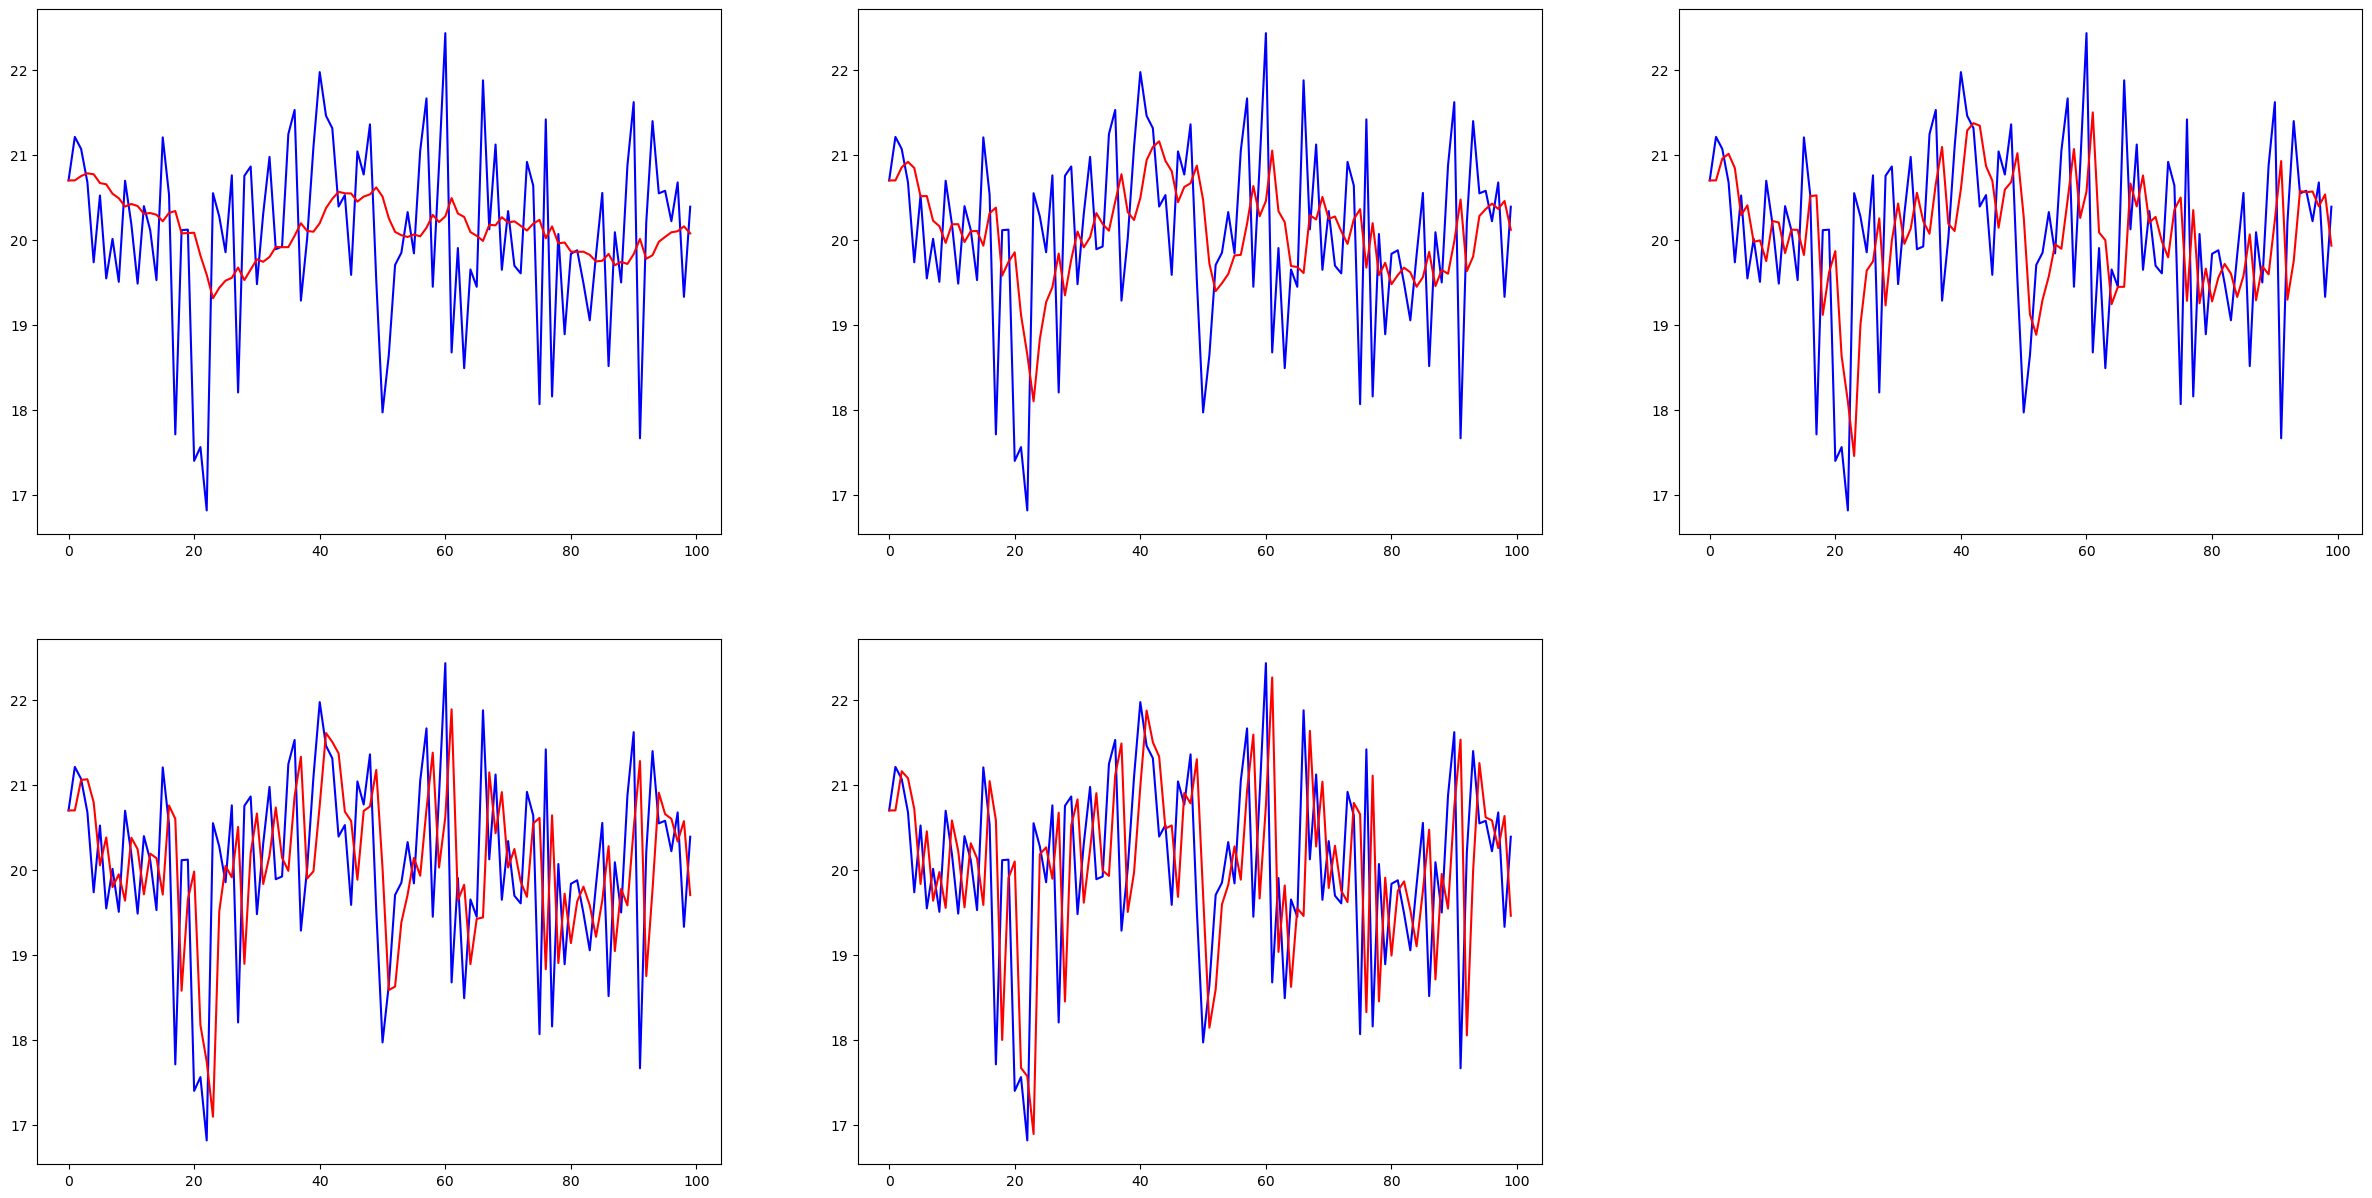

In [18]:
plt.figure(figsize = (30,15))
plt.subplot(2,3,1)
plt.plot(data['at'], color = 'blue')
plt.plot(f_values, color='red')
plt.subplot(2,3,2)
plt.plot(data['at'], color = 'blue')
plt.plot(f_values_2, color='red')
plt.subplot(2,3,3)
plt.plot(data['at'], color = 'blue')
plt.plot(f_values_3, color='red')
plt.subplot(2,3,4)
plt.plot(data['at'], color = 'blue')
plt.plot(f_values_4, color='red')
plt.subplot(2,3,5)
plt.plot(data['at'], color = 'blue')
plt.plot(f_values_5, color='red')
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
MAE =[]
MSE = []
alpha = []
MAE.append(mean_absolute_error(data['at'],f_values))
MSE.append(mean_squared_error(data['at'],f_values))
alpha.append(0.1)
MAE.append(mean_absolute_error(data['at'],f_values_2))
MSE.append(mean_squared_error(data['at'],f_values_2))
alpha.append(0.3)
MAE.append(mean_absolute_error(data['at'],f_values_3))
MSE.append(mean_squared_error(data['at'],f_values_3))
alpha.append(0.5)
MAE.append(mean_absolute_error(data['at'],f_values_4))
MSE.append(mean_squared_error(data['at'],f_values_4))
alpha.append(0.7)
MAE.append(mean_absolute_error(data['at'],f_values_5))
MSE.append(mean_squared_error(data['at'],f_values_5))
alpha.append(0.9)

In [21]:
#tabulating values
final =[]
for i in range(5):
    final.append([alpha[i],MAE[i],MSE[i]])

In [22]:
from tabulate import tabulate
print(tabulate(final,headers=['Alpha', 'MAE','MSE'], tablefmt='orgtbl'))

|   Alpha |      MAE |     MSE |
|---------+----------+---------|
|     0.1 | 0.843465 | 1.19752 |
|     0.3 | 0.876126 | 1.24694 |
|     0.5 | 0.909642 | 1.3816  |
|     0.7 | 0.968856 | 1.57824 |
|     0.9 | 1.0519   | 1.8542  |


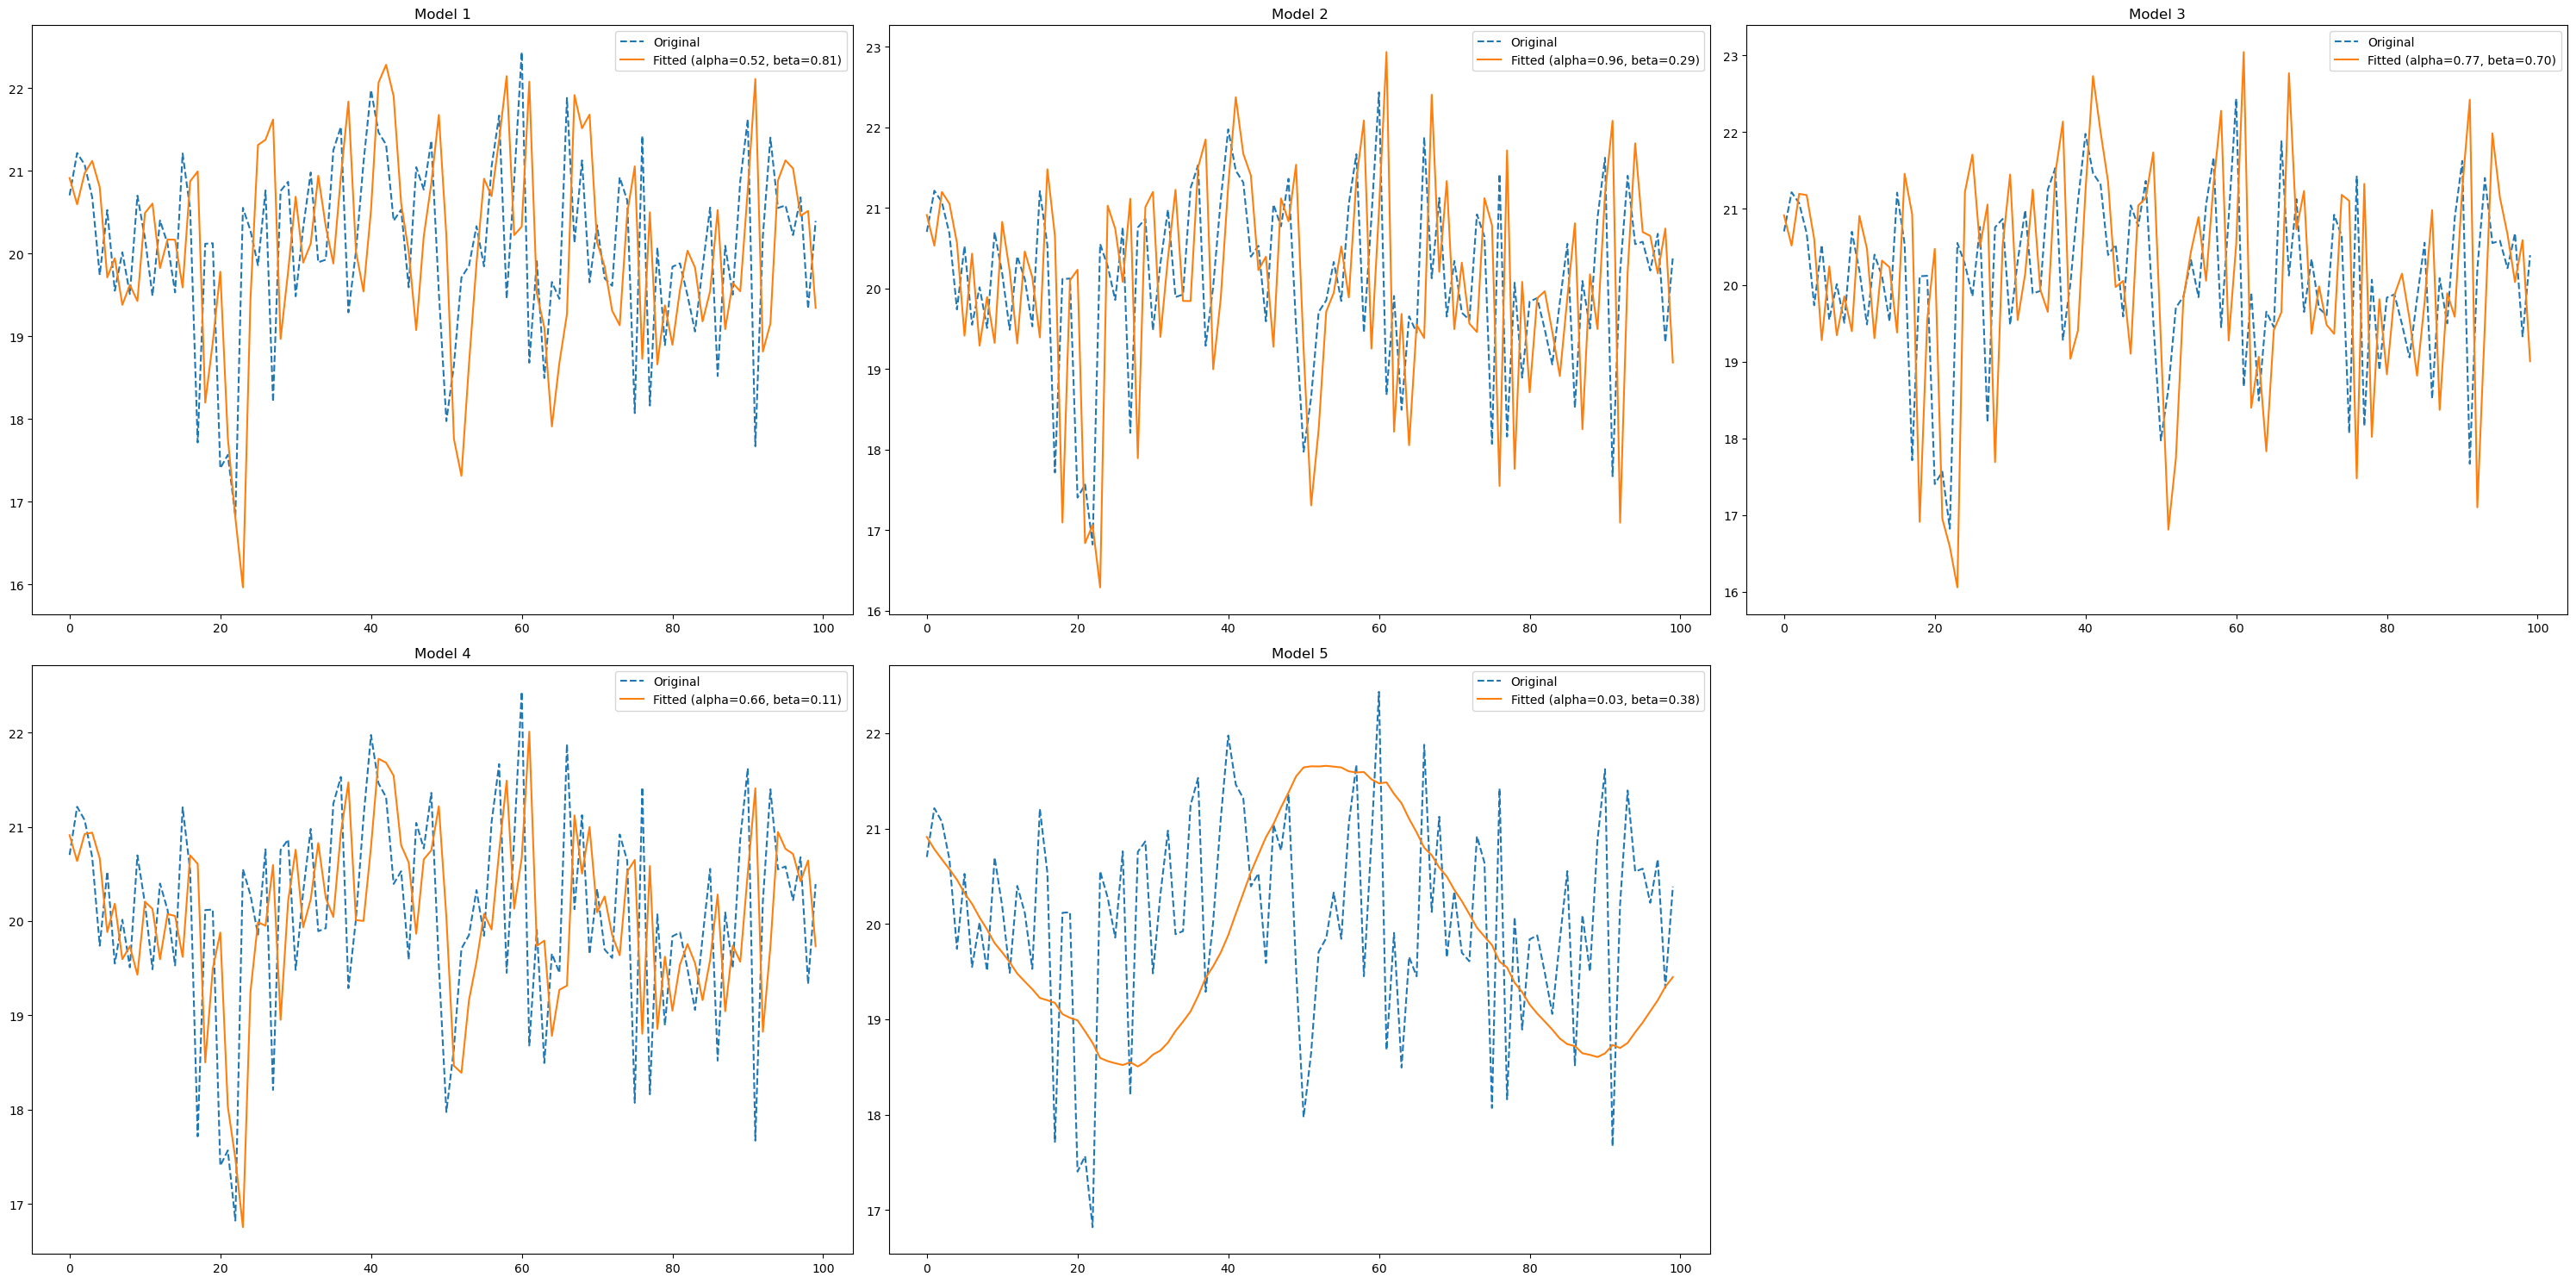

|     Alpha |     Beta |      MAE |     MSE |
|-----------+----------+----------+---------|
| 0.521984  | 0.806691 | 1.15614  | 2.25792 |
| 0.960495  | 0.289625 | 1.24449  | 2.58395 |
| 0.766107  | 0.70422  | 1.30608  | 2.85505 |
| 0.661383  | 0.110162 | 0.993932 | 1.66269 |
| 0.0269368 | 0.384171 | 1.16792  | 2.00893 |


In [25]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

random.seed(17)
np.random.seed(17)

at = []
for i in range(100):
    et = np.random.normal(0,1)
    at.append(10 + (0.5 * i) + et)

df = pd.DataFrame(at, columns=['at'])

final = []
plt.figure(figsize=(30, 15))

for i in range(5):
    alpha = random.uniform(0, 1)
    beta = random.uniform(0, 1)

    model = ExponentialSmoothing(data['at'], trend='add', seasonal=None)
    model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
    f_values = model_fit.fittedvalues

    plt.subplot(2, 3, i + 1)
    plt.plot(data['at'], label='Original', linestyle='--')
    plt.plot(f_values, label=f'Fitted (alpha={alpha:.2f}, beta={beta:.2f})')
    plt.legend()
    plt.title(f'Model {i+1}')

    mae = mean_absolute_error(data['at'], f_values)
    mse = mean_squared_error(data['at'], f_values)
    final.append([alpha, beta, mae, mse])


plt.tight_layout()
plt.show()
print(tabulate(final, headers=['Alpha', 'Beta', 'MAE', 'MSE'], tablefmt='orgtbl'))

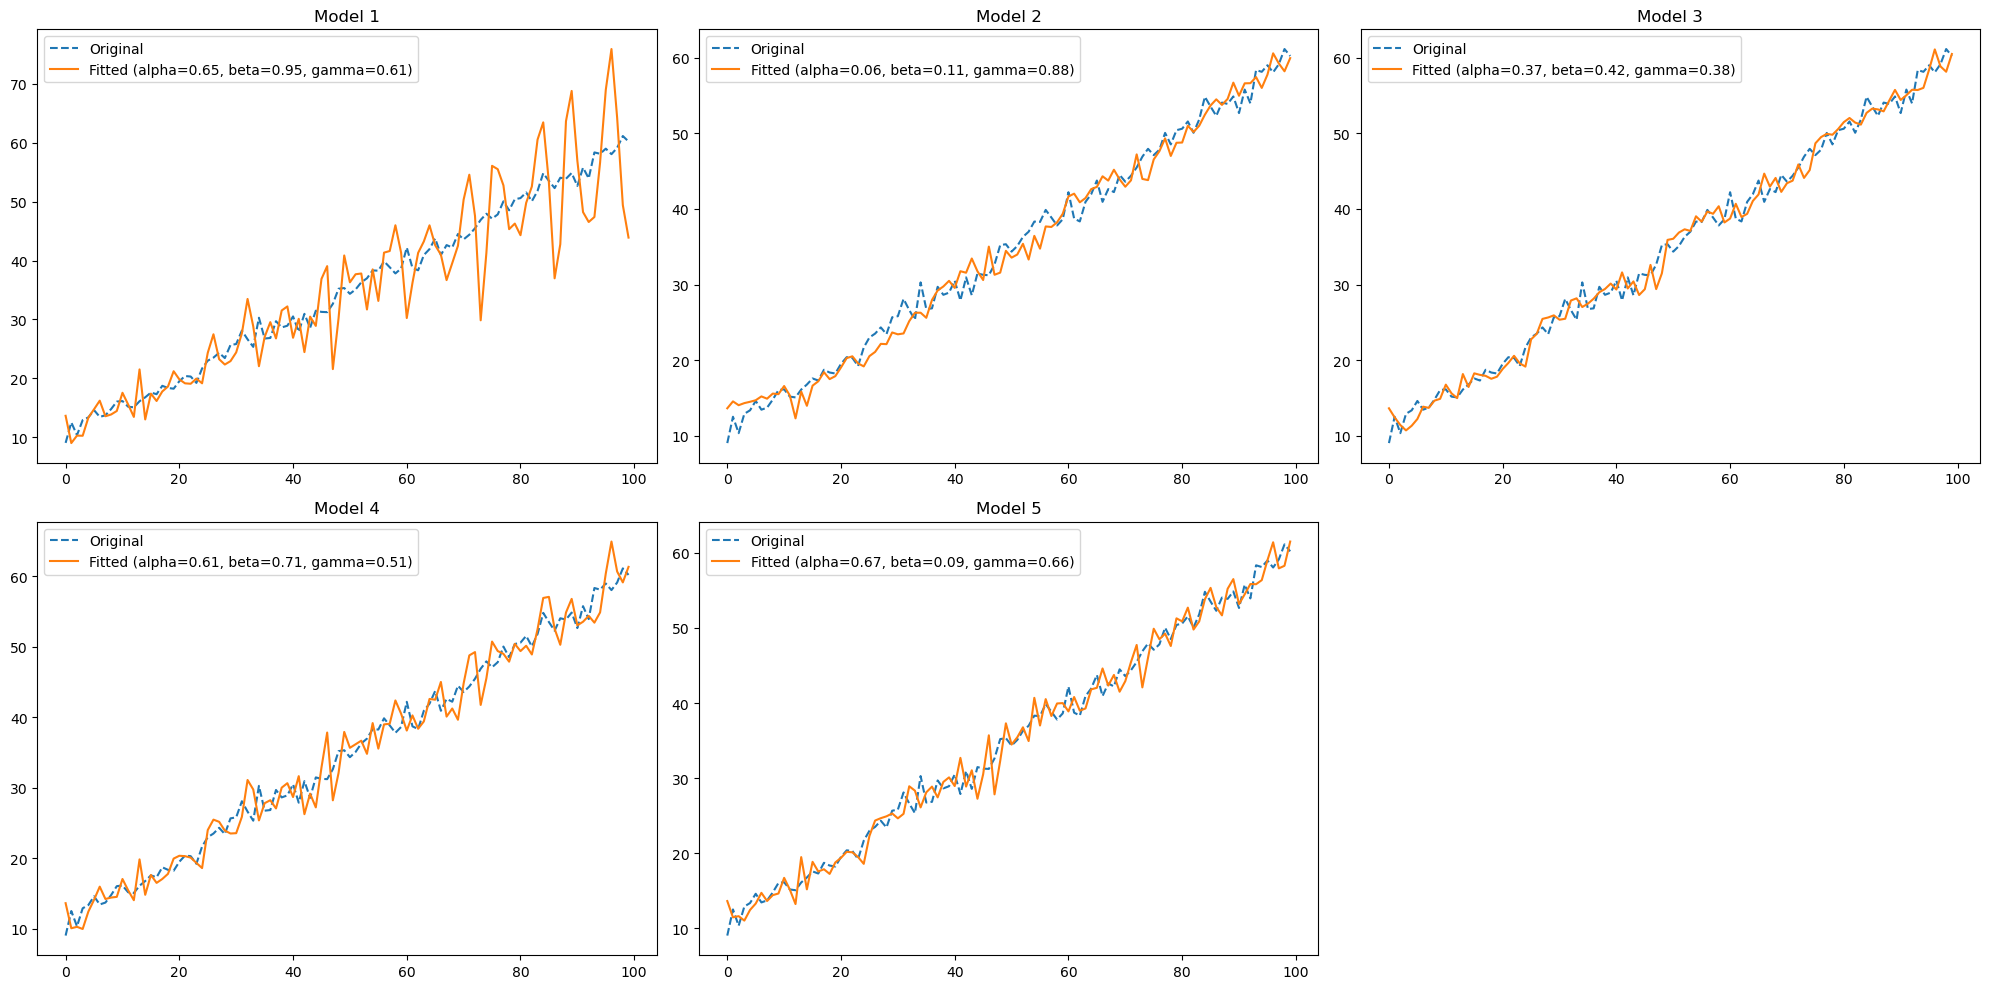

|     Alpha |      Beta |    Gamma |     MAE |      MSE |
|-----------+-----------+----------+---------+----------|
| 0.650264  | 0.951815  | 0.613506 | 4.42915 | 36.4394  |
| 0.0576944 | 0.105647  | 0.882748 | 1.54346 |  3.86082 |
| 0.369322  | 0.418241  | 0.381559 | 1.30906 |  2.81755 |
| 0.605028  | 0.712474  | 0.507366 | 2.02508 |  6.56173 |
| 0.674565  | 0.0872295 | 0.661657 | 1.58529 |  3.96146 |


In [28]:

random.seed(2345)
np.random.seed(2345)

xt = []
for i in range(100):
    et = np.random.normal(0, 1)
    xt.append(10 + (0.5 * i)+math.sin((math.pi*i)/12) + et)

df = pd.DataFrame(xt, columns=['xt'])

final = []
plt.figure(figsize=(20, 10))

# Triple Exponential Smoothing
for i in range(5):
    alpha = random.uniform(0, 1)
    beta = random.uniform(0, 1)
    gamma = random.uniform(0,1) # Added gamma for seasonal component

    # Assuming a period of 12 (you can change this)
    model = ExponentialSmoothing(df['xt'], trend='add', seasonal='add', seasonal_periods=12)
    model_fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma, optimized=False)
    fitted_values = model_fit.fittedvalues

    plt.subplot(2, 3, i + 1)
    plt.plot(df['xt'], label='Original', linestyle='--')
    plt.plot(fitted_values, label=f'Fitted (alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f})')
    plt.legend()
    plt.title(f'Model {i+1}')

    mae = mean_absolute_error(df['xt'], fitted_values)
    mse = mean_squared_error(df['xt'], fitted_values)
    final.append([alpha, beta, gamma, mae, mse])  # Include gamma in the table


plt.tight_layout()
plt.show()
print(tabulate(final, headers=['Alpha', 'Beta', 'Gamma', 'MAE', 'MSE'], tablefmt='orgtbl'))
